In [175]:
import torch
# Load model directly
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer2 = AutoTokenizer.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
model = TFAutoModelForSequenceClassification.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [176]:
import pandas as pd
import numpy as np

In [177]:
df1_500 = pd.read_excel('clean_df1_reviewed.xlsx')
df501_1000 = pd.read_excel('clean_df1_reviewed_500_1000.xlsx')

In [178]:
len(df1_500), len(df501_1000)

(1006, 1006)

In [179]:
with open('removed_list.txt', 'r') as file:
    removed_list = file.read().splitlines()
    file.close()

In [180]:
dfnew = pd.concat([df1_500[:501], df501_1000[501:]], ignore_index=True)
dfnew

,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",46,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",40,Neutral,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",37,Neutral,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",34,Negative,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",33,Negative,1
...,...,...,...,...,...
1001,kampus menipu bkn kampus mengajar,"['kampus', 'tipu', 'bkn', 'kampus', 'mengajar']",0,Negative,1
1002,@tanyarlfes nanya tentang kampus mengajar,"['nanya', 'kampus', 'mengajar']",0,Neutral,1
1003,Ga expect kampus mengajar life serumit ini,"['ga', 'expect', 'kampus', 'mengajar', 'life',...",0,Negative,1
1004,ikut kampus mengajar karena gak segutluking ti...,"['kampus', 'mengajar', 'gak', 'segutluking', '...",0,Positive,1


In [181]:
removed_indices = [int(index) for index in removed_list]
dfnew = dfnew.drop(dfnew.index[removed_indices])

In [182]:
def sentiment_analysis2(text):
    #for word in text
    text = text.replace('[','').replace(']','').replace("'",'').split(', ')
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    polarity = 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
    return score,polarity

In [183]:
from pathlib import Path
import csv
DDIR = Path().parent
lexicon_positive = dict()
with open(f'{DDIR}/InSet-master/positive.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    display(reader)
    for row in reader:
        #if not a number
        if(not row[1].isdigit()):
            continue
        lexicon_positive[row[0]] = int(row[1])
    file.close()
        
lexicon_negative = dict()
with open(f'{DDIR}/InSet-master/negative.csv','r') as file:
    reader2 = csv.reader(file, delimiter=',')
    cek = True
    for row in reader2:
        if cek:
            cek = False
            continue
        # if(not row[1].isdigit()):
        #     continue
        lexicon_negative[row[0]] = int(row[1])
    file.close()


In [184]:
result_dfnew = dfnew['Tokenized_FullText'].apply(sentiment_analysis2)

dfnew['Score'] = [result[0] for result in result_dfnew]
dfnew['Polarity'] = [result[1] for result in result_dfnew]
print(dfnew['Polarity'].value_counts())
dfnew

Polarity
Negative    385
Positive    315
Neutral     138
Name: count, dtype: int64


,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",22,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",21,Positive,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",27,Positive,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",19,Positive,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",5,Positive,1
...,...,...,...,...,...
1001,kampus menipu bkn kampus mengajar,"['kampus', 'tipu', 'bkn', 'kampus', 'mengajar']",0,Neutral,1
1002,@tanyarlfes nanya tentang kampus mengajar,"['nanya', 'kampus', 'mengajar']",-1,Negative,1
1003,Ga expect kampus mengajar life serumit ini,"['ga', 'expect', 'kampus', 'mengajar', 'life',...",-7,Negative,1
1004,ikut kampus mengajar karena gak segutluking ti...,"['kampus', 'mengajar', 'gak', 'segutluking', '...",-4,Negative,1


In [185]:
# X = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')
X = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'')
X

0       naah, genx, lulus, kampus, plat, merah, jadul,...
1       alhamdulillah, hdup, sederhana, dr, dl, gada, ...
2       cm, jd, sender, pas, kampus, mengajar, full, y...
3       kampus, mengajar, capek, banget, asli, dapet, ...
4       bantu, pinjam, fasilitas, sekolah, bantu, dana...
                              ...                        
1001                  kampus, tipu, bkn, kampus, mengajar
1002                              nanya, kampus, mengajar
1003            ga, expect, kampus, mengajar, life, rumit
1004    kampus, mengajar, gak, segutluking, tim, km, b...
1005                               kampus, mengajar, scam
Name: Tokenized_FullText, Length: 838, dtype: object

In [186]:
polarity_hash = {'Positive': 0, 'Negative': 2, 'Neutral':1}
y = dfnew['Polarity'].map(polarity_hash)
y

0       0
1       0
2       0
3       0
4       0
       ..
1001    1
1002    2
1003    2
1004    2
1005    1
Name: Polarity, Length: 838, dtype: int64

In [187]:
len(X), len(y)
df_xy = pd.DataFrame({'X': X, 'y': y})
df_xy

,X,y
0,"naah, genx, lulus, kampus, plat, merah, jadul,...",0
1,"alhamdulillah, hdup, sederhana, dr, dl, gada, ...",0
2,"cm, jd, sender, pas, kampus, mengajar, full, y...",0
3,"kampus, mengajar, capek, banget, asli, dapet, ...",0
4,"bantu, pinjam, fasilitas, sekolah, bantu, dana...",0
...,...,...
1001,"kampus, tipu, bkn, kampus, mengajar",1
1002,"nanya, kampus, mengajar",2
1003,"ga, expect, kampus, mengajar, life, rumit",2
1004,"kampus, mengajar, gak, segutluking, tim, km, b...",2


In [188]:
#train
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")



In [189]:
#Predict
y_pred = df_xy['X'].apply(lambda x: pipe(x)[0]['label'])
y_pred

0       Positive
1       Positive
2       Positive
3       Negative
4        Neutral
          ...   
1001    Negative
1002     Neutral
1003    Negative
1004     Neutral
1005     Neutral
Name: X, Length: 838, dtype: object

In [190]:
y_pred.value_counts()

X
Neutral     379
Negative    322
Positive    137
Name: count, dtype: int64

In [191]:
df_xy['y_pred'] = y_pred.map(polarity_hash)
df_xy

,X,y,y_pred
0,"naah, genx, lulus, kampus, plat, merah, jadul,...",0,0
1,"alhamdulillah, hdup, sederhana, dr, dl, gada, ...",0,0
2,"cm, jd, sender, pas, kampus, mengajar, full, y...",0,0
3,"kampus, mengajar, capek, banget, asli, dapet, ...",0,2
4,"bantu, pinjam, fasilitas, sekolah, bantu, dana...",0,1
...,...,...,...
1001,"kampus, tipu, bkn, kampus, mengajar",1,2
1002,"nanya, kampus, mengajar",2,1
1003,"ga, expect, kampus, mengajar, life, rumit",2,2
1004,"kampus, mengajar, gak, segutluking, tim, km, b...",2,1


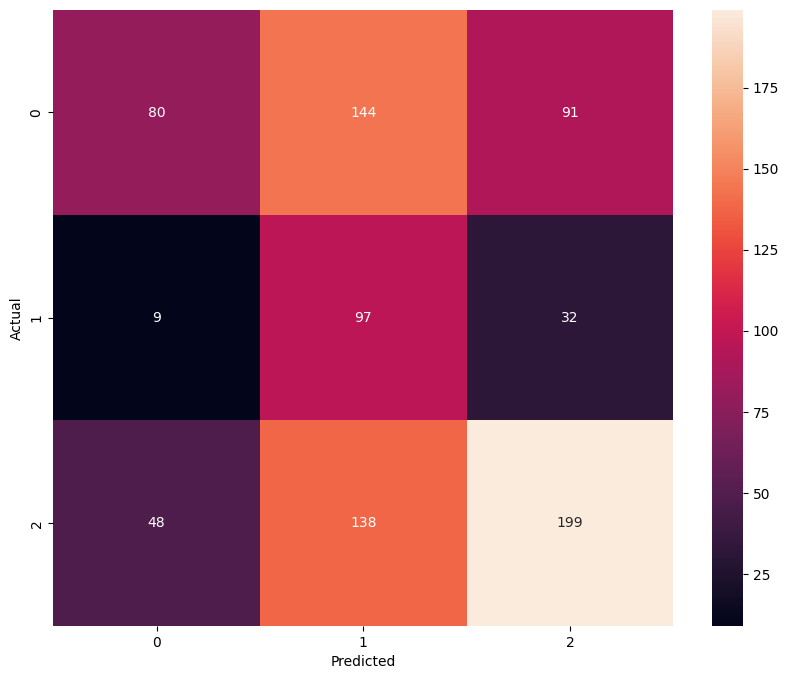

In [192]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df_xy['y'], df_xy['y_pred'])

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(df_xy['y'], df_xy['y_pred'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [193]:
#Map back to polarity

polarity_hash = {0: 'Positive', 2: 'Negative', 1: 'Neutral'}
df_xy['y_pred'] = df_xy['y_pred'].map(polarity_hash)
df_xy['y'] = df_xy['y'].map(polarity_hash)
df_xy

,X,y,y_pred
0,"naah, genx, lulus, kampus, plat, merah, jadul,...",Positive,Positive
1,"alhamdulillah, hdup, sederhana, dr, dl, gada, ...",Positive,Positive
2,"cm, jd, sender, pas, kampus, mengajar, full, y...",Positive,Positive
3,"kampus, mengajar, capek, banget, asli, dapet, ...",Positive,Negative
4,"bantu, pinjam, fasilitas, sekolah, bantu, dana...",Positive,Neutral
...,...,...,...
1001,"kampus, tipu, bkn, kampus, mengajar",Neutral,Negative
1002,"nanya, kampus, mengajar",Negative,Neutral
1003,"ga, expect, kampus, mengajar, life, rumit",Negative,Negative
1004,"kampus, mengajar, gak, segutluking, tim, km, b...",Negative,Neutral


In [194]:
#to excel + dfnew, rearrange to full_text, polarity, prediction
dfnew['Prediction'] = df_xy['y_pred']
dfnew = dfnew[['full_text', 'Polarity', 'Score', 'Prediction', 'Tokenized_FullText']]
dfnew.to_excel('dfnew_sentiment_analysis.xlsx', index=False)
dfnew['Tokenized_FullText'] = df_xy['X']

#change tokenized from str to list

dfnew['Tokenized_FullText'] = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')


C:\Users\Windows\AppData\Local\Temp\ipykernel_59012\2062237629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tokenized_FullText'] = df_xy['X']
C:\Users\Windows\AppData\Local\Temp\ipykernel_59012\2062237629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tokenized_FullText'] = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')


In [195]:
dfnew.head(10)

,full_text,Polarity,Score,Prediction,Tokenized_FullText
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,Positive,22,Positive,"[naah, genx, lulus, kampus, plat, merah, jadul..."
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,Positive,21,Positive,"[alhamdulillah, hdup, sederhana, dr, dl, gada,..."
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,Positive,27,Positive,"[cm, jd, sender, pas, kampus, mengajar, full, ..."
3,Kampus mengajar itu capek banget asli apalagi ...,Positive,19,Negative,"[kampus, mengajar, capek, banget, asli, dapet,..."
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,Positive,5,Neutral,"[bantu, pinjam, fasilitas, sekolah, bantu, dan..."
5,@collegemenfess Pernah ikut kampus mengajar se...,Positive,2,Positive,"[kampus, mengajar, seru, banget, yg, jurus, di..."
6,@shiseora @collegemenfess Kalau jurusan keguru...,Positive,16,Negative,"[jurus, guru, saran, kampus, mengajar, beneran..."
7,@collegemenfess aku kemarin ikut kampus mengaj...,Positive,8,Positive,"[kemarin, kampus, mengajar, seru, banget, terj..."
8,@zavvac @Kemdikbud_RI Kok beda banget ya padah...,Positive,12,Negative,"[beda, banget, ya, kampus, mengajar, dana, ben..."
9,Beneran deh kampus mengajar tuh se-capek itu. ...,Positive,10,Negative,"[beneran, deh, kampus, mengajar, tuh, capek, k..."


(-0.5, 799.5, 399.5, -0.5)

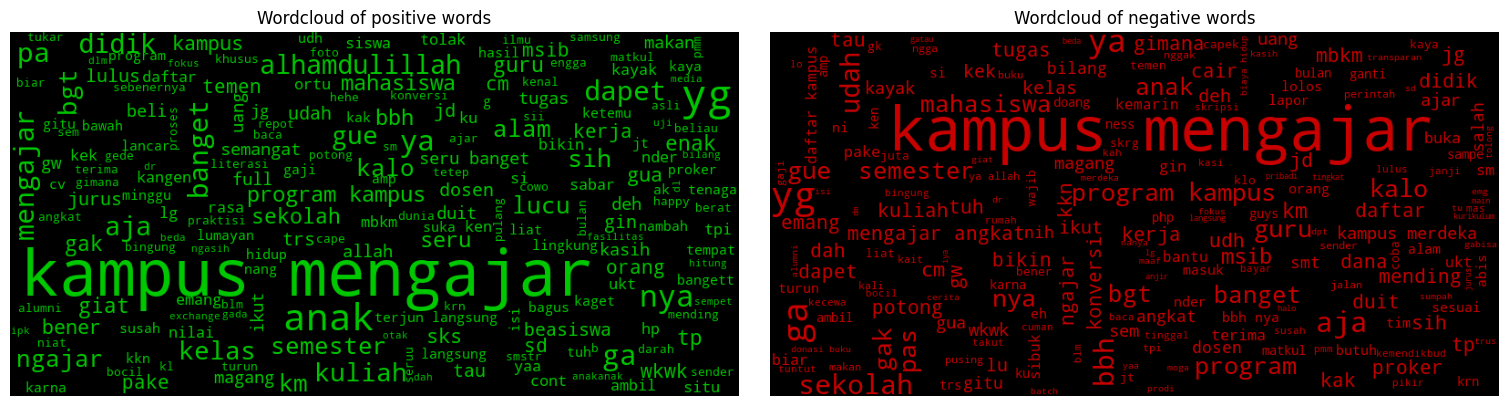

In [196]:
#Wordcloud for positive and negative after predicted
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ''
negative_text = ''

for index, row in dfnew.iterrows():
    if row['Prediction'] == 'Positive':
        for word in row['Tokenized_FullText']:
            positive_text += word + ' '
    else:
        for word in row['Tokenized_FullText']:
            negative_text += word + ' '

positive_wordcloud = WordCloud(width=800, height=400, color_func=lambda *args, **kwargs: (0,200,0)).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, color_func=lambda *args, **kwargs: (200,0,0)).generate(negative_text)

#show both
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title('Wordcloud of positive words')
ax[0].grid(False)
ax[0].imshow((positive_wordcloud))
ax[0].axis('off')
fig.tight_layout(pad=0)
ax[1].set_title('Wordcloud of negative words')
ax[1].grid(False)
ax[1].imshow((negative_wordcloud))
ax[1].axis('off')



In [197]:
pipe.model.